In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
dataset = np.random.exponential(.1,size=100)

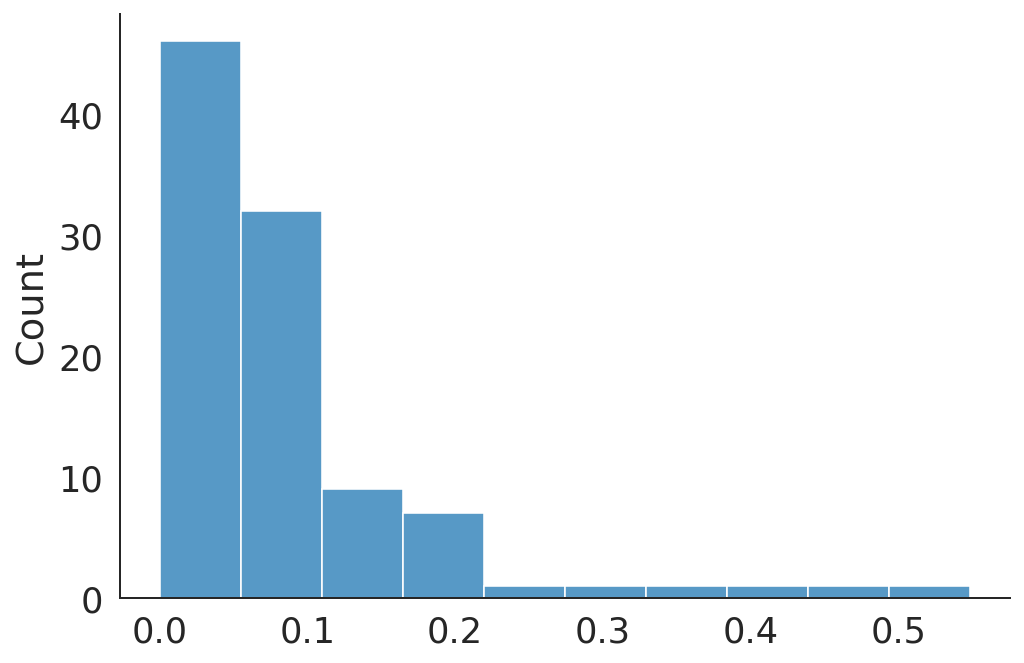

In [3]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(dataset, kind="hist", bins = 10, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
beta,273.690207,171.160236,119.103346,inf
gamma,277.704819,120.109804,115.954367,inf
lognorm,315.334748,136.565645,128.661969,inf
burr,566.522594,79.262399,191.855359,inf
norm,591.671219,381.165835,186.988433,inf


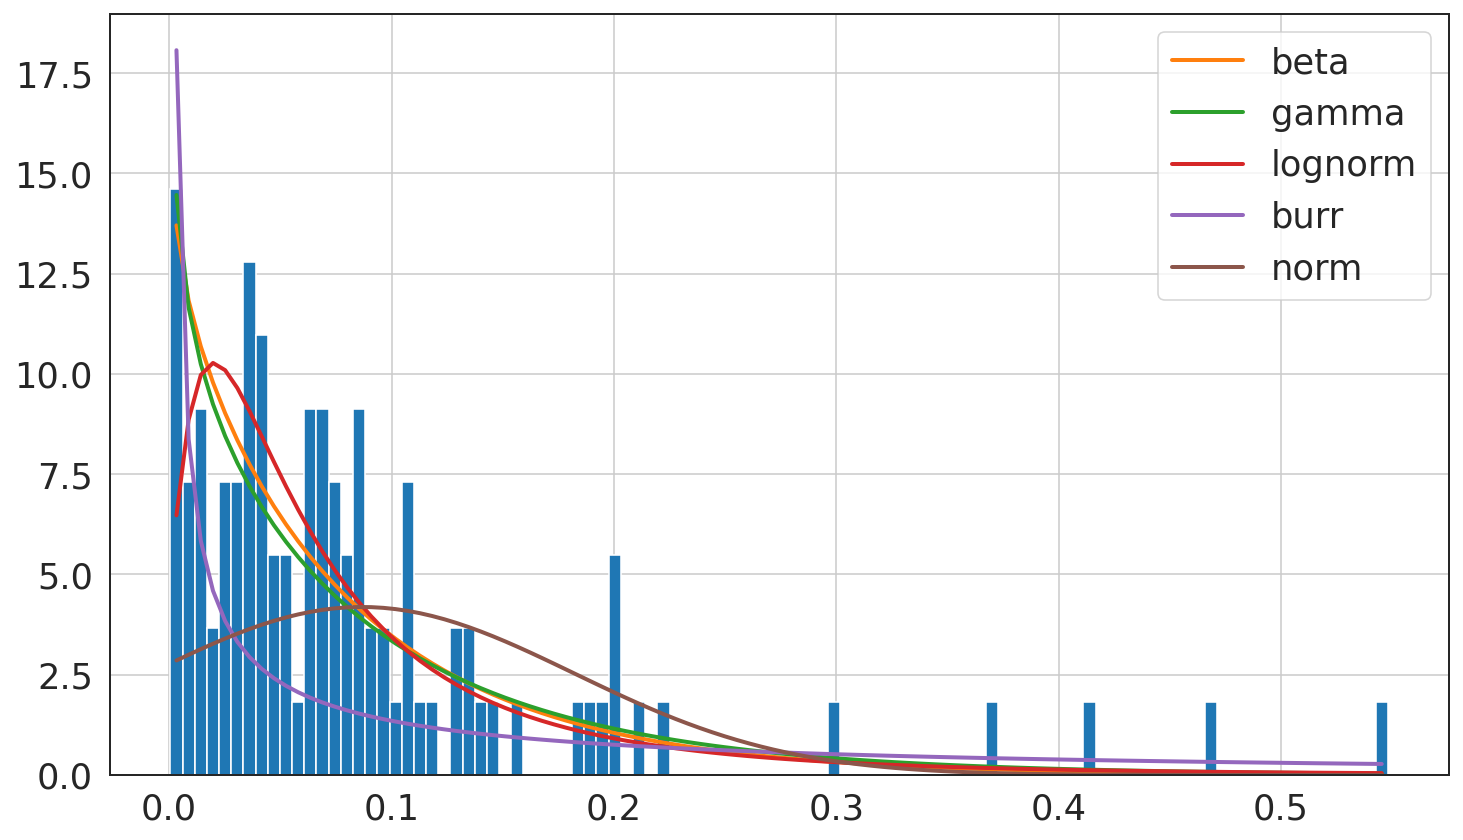

In [4]:
f = Fitter(dataset,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [5]:
dp = f.get_best(method = 'sumsquare_error')
dp

{'beta': {'a': 0.9219514303164928,
  'b': 135.6845169544108,
  'loc': 0.0005509581991040337,
  'scale': 11.969750325404757}}

In [6]:
dp['burr']['c']

KeyError: 'burr'

In [15]:
f = Fitter(dataset,
           distributions=get_common_distributions()
          )
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
expon,291.509112,86.031170,116.200448,inf
gamma,302.105707,106.373869,124.376190,inf
chi2,304.670897,70.223652,125.221709,inf
lognorm,318.970744,96.618335,129.808431,inf
exponpow,332.703551,-3.382996,134.023677,inf


In [16]:
dp = f.get_best(method = 'sumsquare_error')
dp

{'expon': {'loc': 0.00041118665436637875, 'scale': 0.10406563721469715}}